<a href="https://colab.research.google.com/github/varunraj42/First_Repo/blob/fresh_branch/Titanic_eta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import seaborn as sns

In [4]:
gs = pd.read_csv('gender_submission.csv', header=0)
train = pd.read_csv('train.csv', header=0)
test = pd.read_csv('test.csv', header=0)

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
gs.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


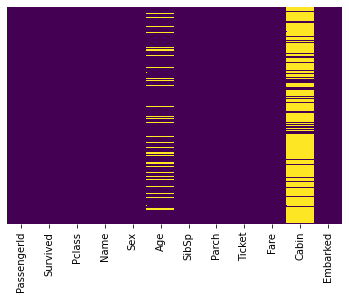

In [15]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


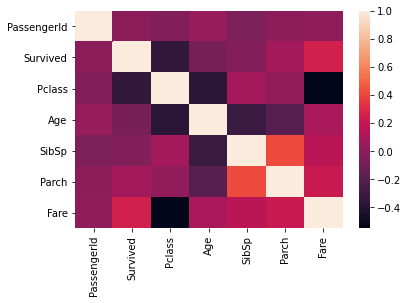

In [31]:
sns.heatmap(train.corr())

In [79]:
df = train.drop(['PassengerId','Name'],axis=1)
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [119]:
sns.set_style('whitegrid')
# sns.countplot(x='Survived', data=df, hue='Sex')
# sns.countplot(x='Survived', data=df, hue='Cabin', palette='RdBu_r')
# df = df.drop(['Embarked','Cabin','Ticket], axis=1)

In [69]:
def impute_age(cols):
  age = cols[0]
  pclass = cols[1]

  if pd.isnull(age):
    if pclass == 1:
      return 37
    elif pclass == 2:
      return 29
    elif pclass == 3:
      return 25
  else:
    return age

In [81]:
df['Age'] = df[['Age','Pclass']].apply(impute_age, axis=1)

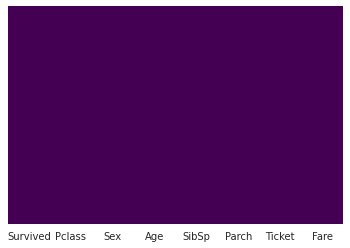

In [84]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [58]:
# df = df.drop(['Cabin'], axis=1)
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare'],
      dtype='object')

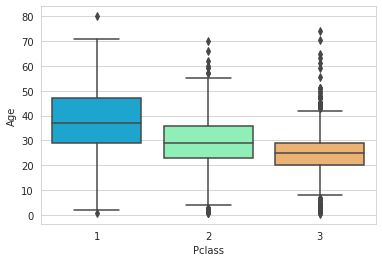

In [71]:
sns.boxplot(x='Pclass',y='Age',data=df, palette='rainbow')

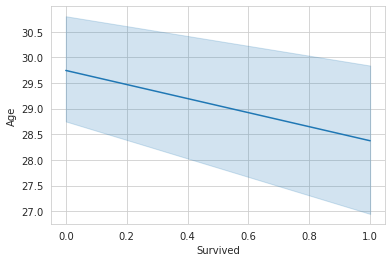

In [73]:
sns.lineplot(x='Survived',y='Age',data=df)

In [113]:
Sex = pd.get_dummies(df['Sex'],drop_first=True)
df = df.drop(['Sex'], axis=1)
df['Sex'] = Sex

In [120]:
# test = test.drop(list(set(train.columns) - set(df.columns)), axis=1)
test.columns
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex'], dtype='object')

In [121]:
target = df['Survived']
features = df.drop('Survived', axis=1)

In [110]:
features

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,3,male,22.0,1,0,A/5 21171,7.2500
1,1,female,38.0,1,0,PC 17599,71.2833
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250
3,1,female,35.0,1,0,113803,53.1000
4,3,male,35.0,0,0,373450,8.0500
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,211536,13.0000
887,1,female,19.0,0,0,112053,30.0000
888,3,female,25.0,1,2,W./C. 6607,23.4500
889,1,male,26.0,0,0,111369,30.0000


In [100]:
from sklearn.model_selection import train_test_split

In [122]:
X_train,X_test,y_train,y_test = train_test_split(features, target, test_size=0.30, random_state=101)

In [102]:
from sklearn.linear_model import LogisticRegression

In [105]:
model = LogisticRegression()

In [123]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
predictions = model.predict(X_test)

In [125]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [128]:
confusion_matrix(y_test, predictions)

array([[132,  22],
       [ 39,  75]])

In [130]:
accuracy_score(y_test, predictions)

0.7723880597014925

# New section